# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Bunmi Akinremi</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (15.0, 12.0)

In [3]:
# Read csv
df = pd.read_csv('winequality.csv')
dfX = pd.read_csv('winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# information about the various data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# check for percentage of missing values
df.isnull().sum() / len(df) *100

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [7]:
# unique features
df.pH.unique()

array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.35, 3.28, 3.58, 3.17,
       3.11, 3.38, 3.04, 3.52, 3.43, 3.34, 3.47, 3.46, 3.45, 3.4 , 3.42,
       3.23, 3.5 , 3.33, 3.21, 3.48, 3.9 , 3.25, 3.32, 3.15, 3.41, 3.44,
       3.31, 3.54, 3.13, 2.93, 3.14, 3.75, 3.85, 3.29, 3.08, 3.37, 3.19,
       3.07, 3.49, 3.53, 3.24, 3.63, 3.22, 3.68, 2.74, 3.59, 3.  , 3.12,
       3.57, 3.61, 3.06, 3.6 , 3.69, 3.1 , 3.05, 3.67, 3.27, 3.18, 3.02,
       3.55, 2.99, 3.01, 3.56, 3.03, 3.62, 2.88, 2.95, 2.98, 3.09, 2.86,
       3.74, 2.92, 3.72, 2.87, 2.89, 2.94, 3.66, 3.71, 3.78, 3.7 , 4.01,
       2.9 ])

In [8]:
# unique features
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

# Exploratory Data Analysis

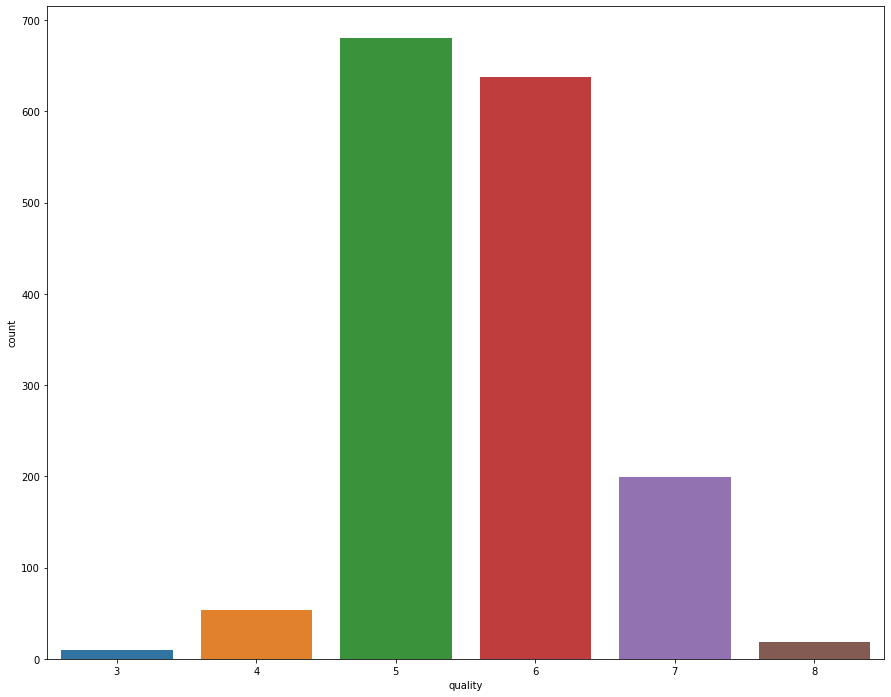

In [9]:
# Our label Distribution (countplot)
sns.countplot(df['quality'])

##### based on this, we can see that the data is more between 5, 6 and 7

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000237CD2E59C8>,
      dtype=object)

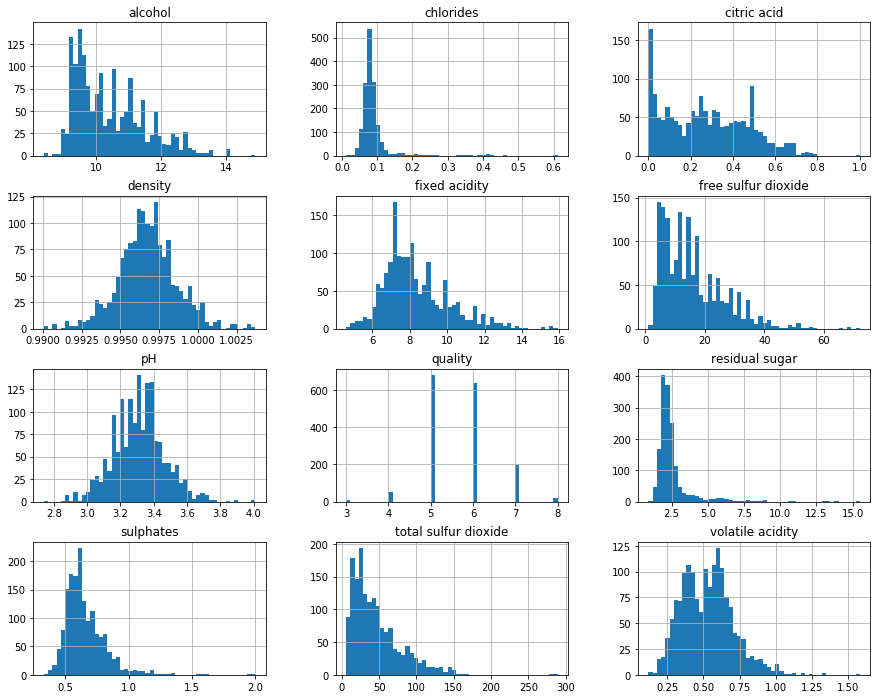

In [10]:
# plotting the histogram
df.hist(bins=50)

#### some of the data are skewed to the left and some to the right

### Scatterplot showing the differrent quality range for various amounts of sulphates against chlorides

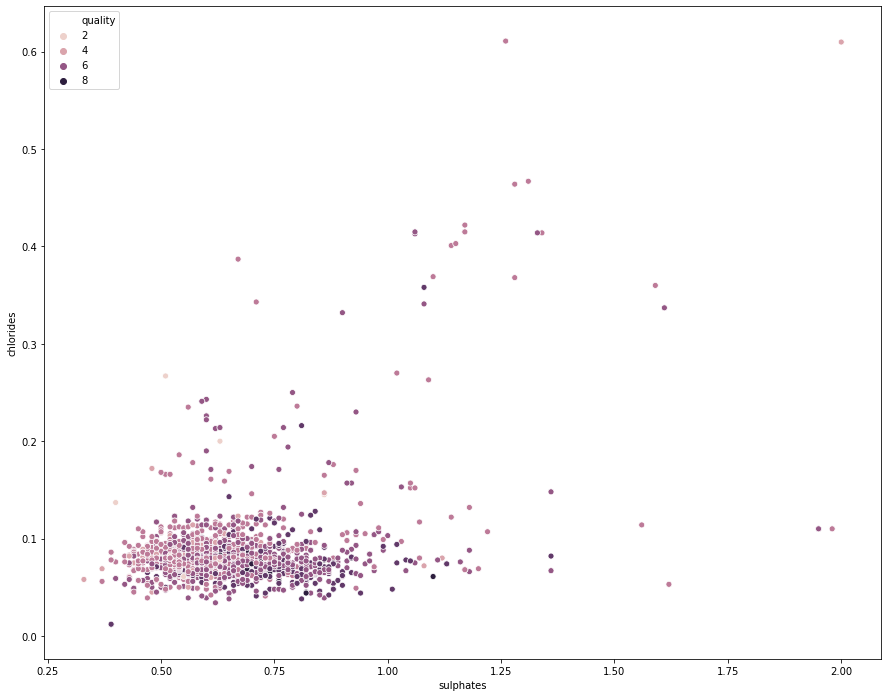

In [11]:
sns.scatterplot(x='sulphates', y='chlorides', hue='quality', data=df)

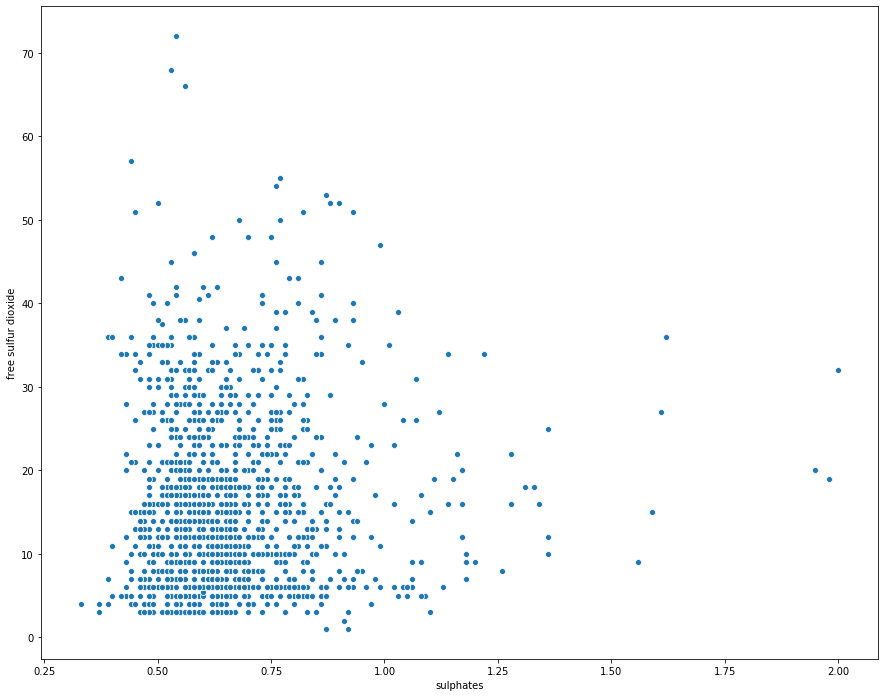

In [12]:
sns.scatterplot(x='sulphates', y='free sulfur dioxide',  data=df)

### We see that the more the free sulphur dioxide, the better the quality and the more the volaticity, the lesser the quality. 
### This is beacuse the presence of sulphur dioxide reduces volatile acidity which causes sour taste in wines

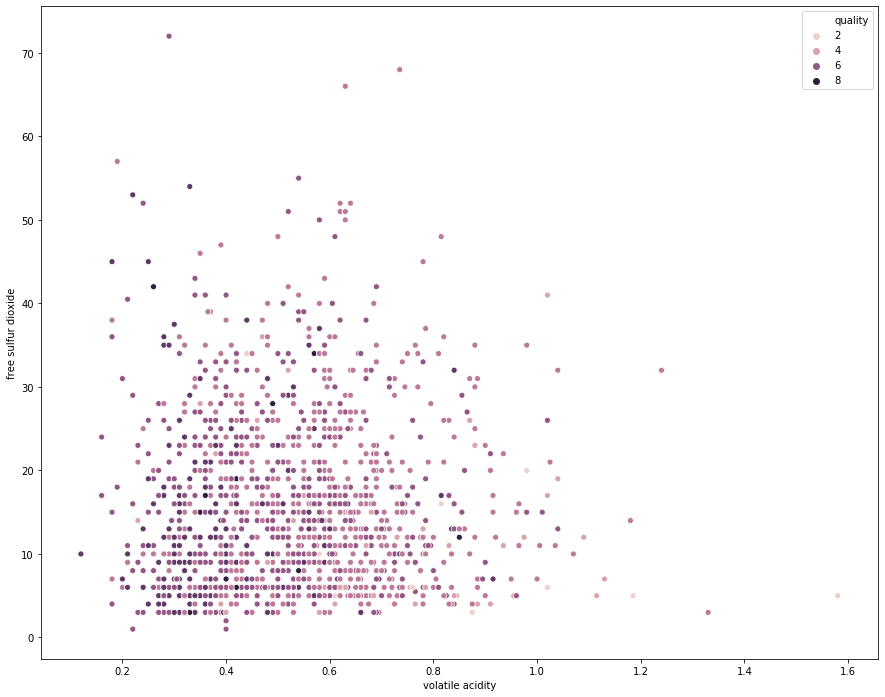

In [13]:
sns.scatterplot(x='volatile acidity', y='free sulfur dioxide', hue='quality', data=df)

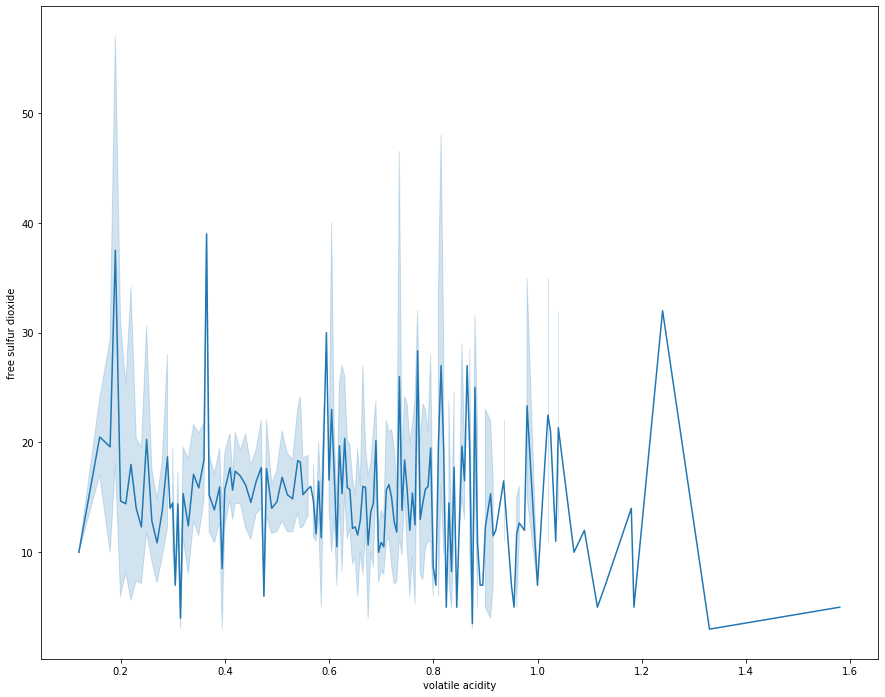

In [14]:
sns.lineplot(x='volatile acidity', y='free sulfur dioxide', data=df)

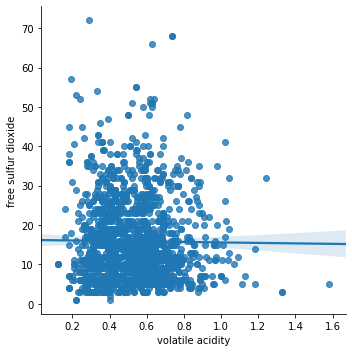

In [15]:
sns.lmplot(x='volatile acidity', y='free sulfur dioxide', data=df)

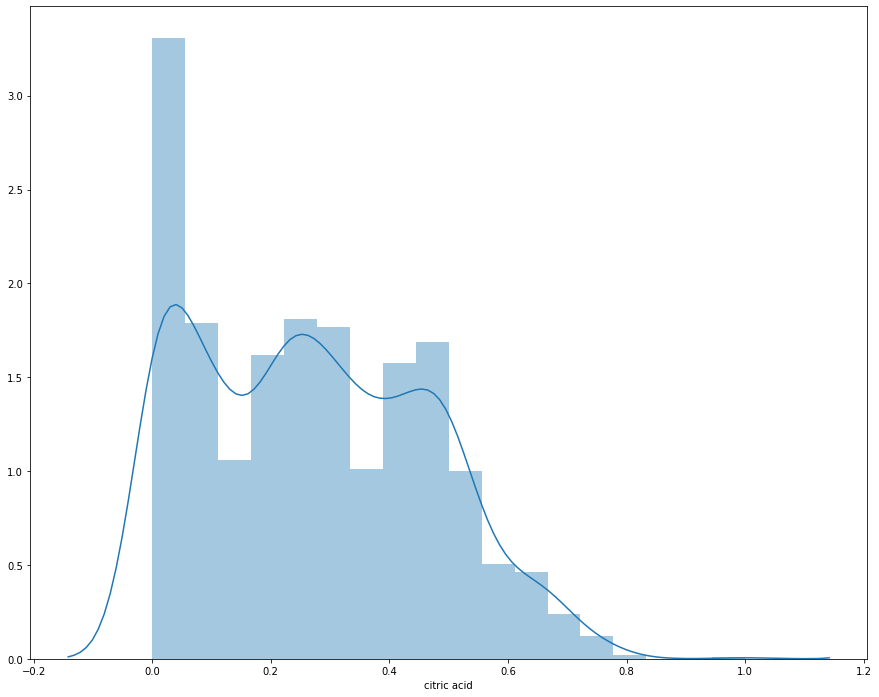

In [16]:
# distplot for the amount of citric acid present
sns.distplot(df['citric acid'])

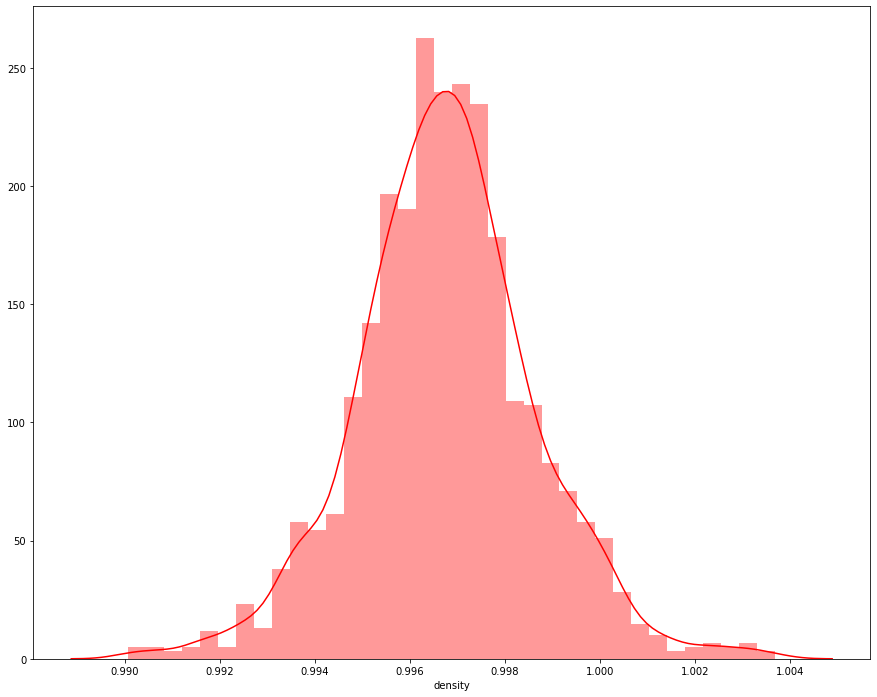

In [17]:
# distplot for the density
sns.distplot(df['density'],color="r")

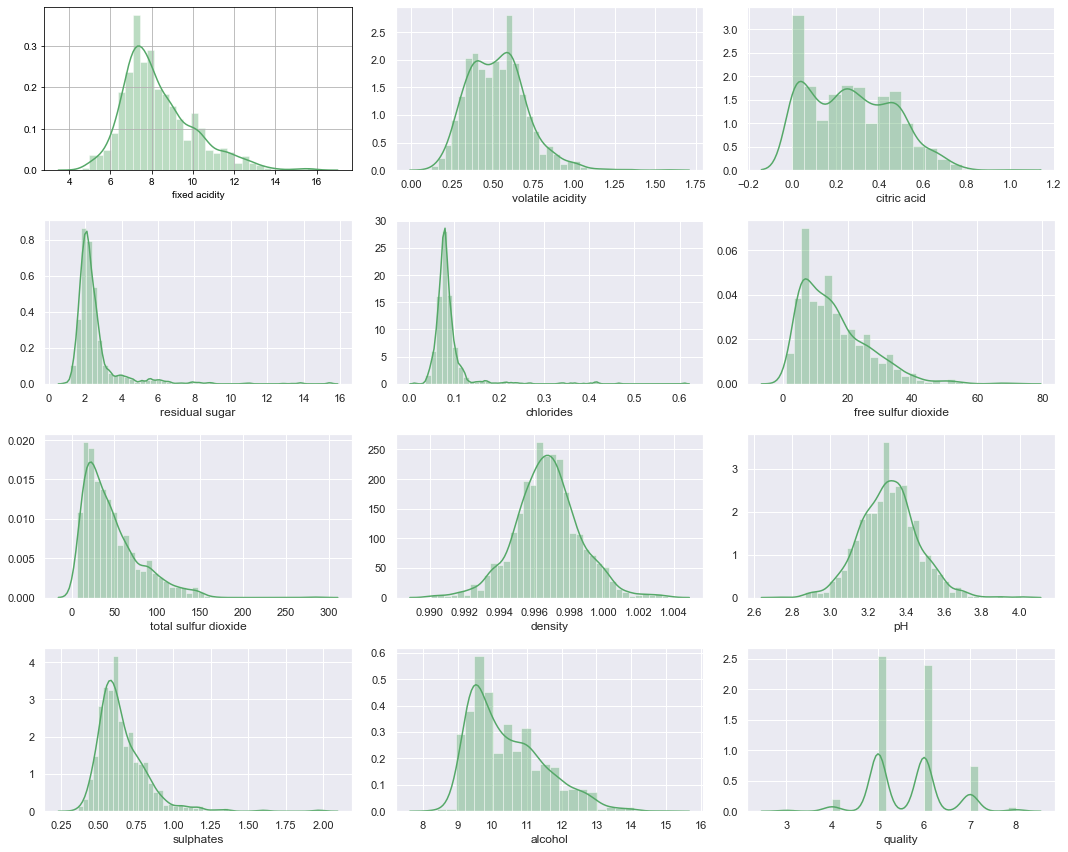

In [18]:
for i, k in enumerate(df.keys()):
    plt.subplot(4, 3, i+1)
    sns.set()
    sns.distplot(df[k],color="g")
    plt.grid('on')
    plt.tight_layout()

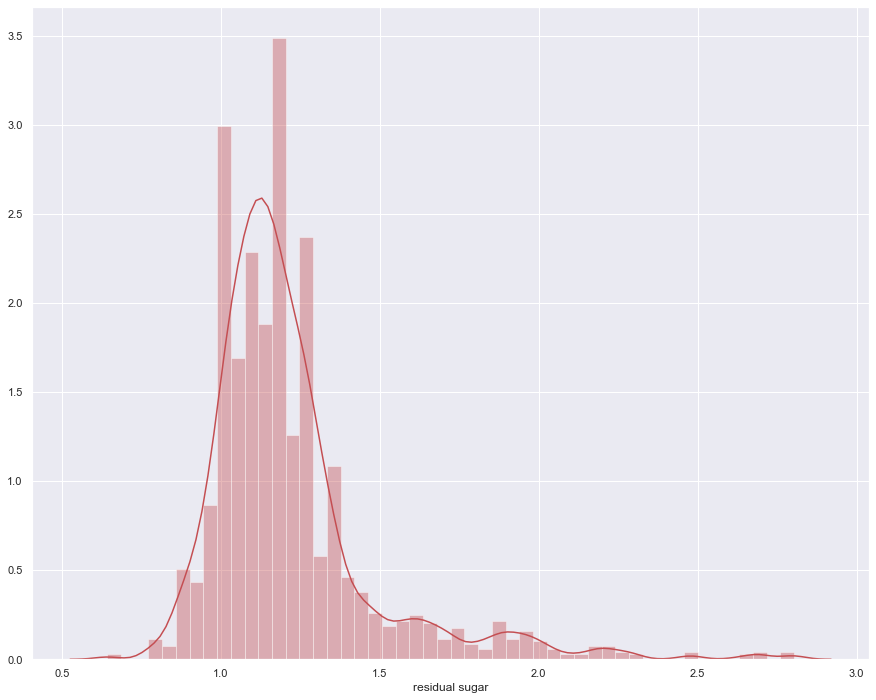

In [19]:
X = np.log(df['residual sugar'] +1)
sns.distplot(X,color="r")

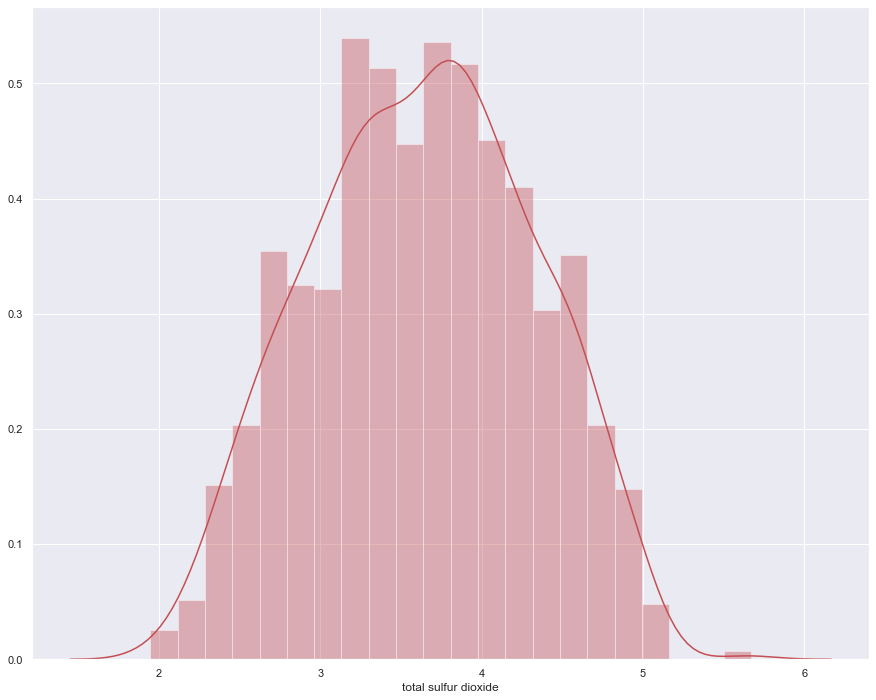

In [20]:
X = np.log(df['total sulfur dioxide'] + 1)
sns.distplot(X,color="r")

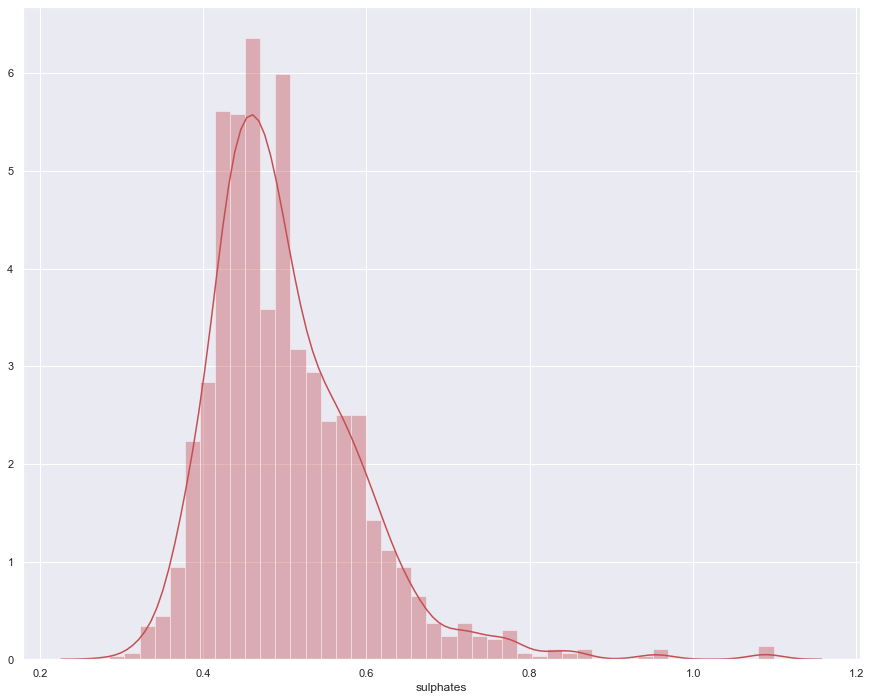

In [21]:
X = np.log(df['sulphates'] + 1)
sns.distplot(X,color="r")

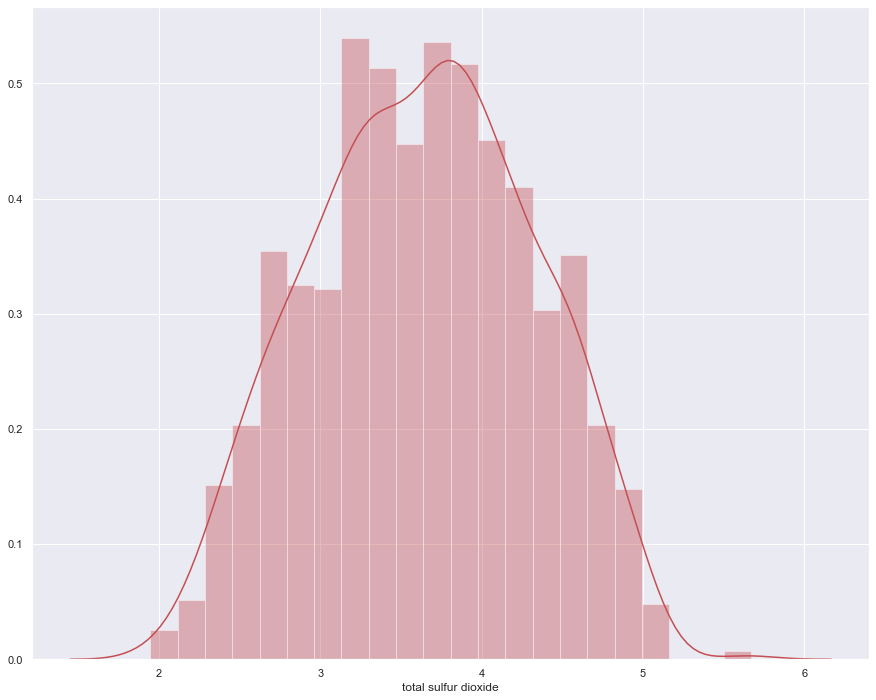

In [22]:
X= np.log(df['total sulfur dioxide'] + 1)

sns.distplot(X,color="r")

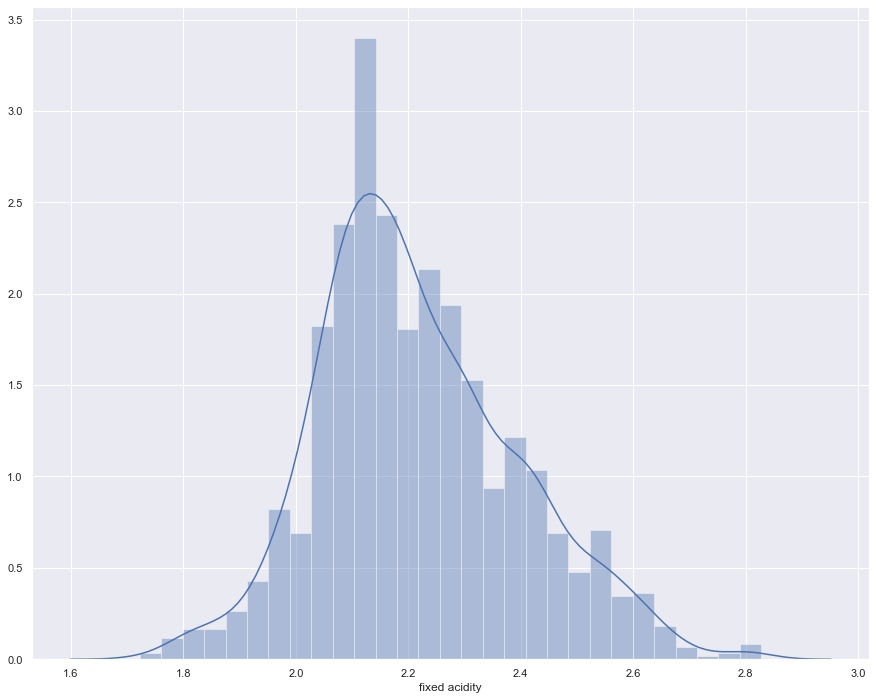

In [23]:
X =  np.log(df['fixed acidity'] + 1)

sns.distplot(X,color="b")

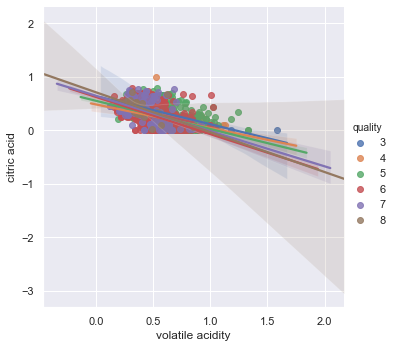

In [24]:
#  multiple regression lines for volatile acidity against one of the fixed acids found in wines(citric acid)
sns.lmplot(x='volatile acidity', y='citric acid', hue='quality', data=df)

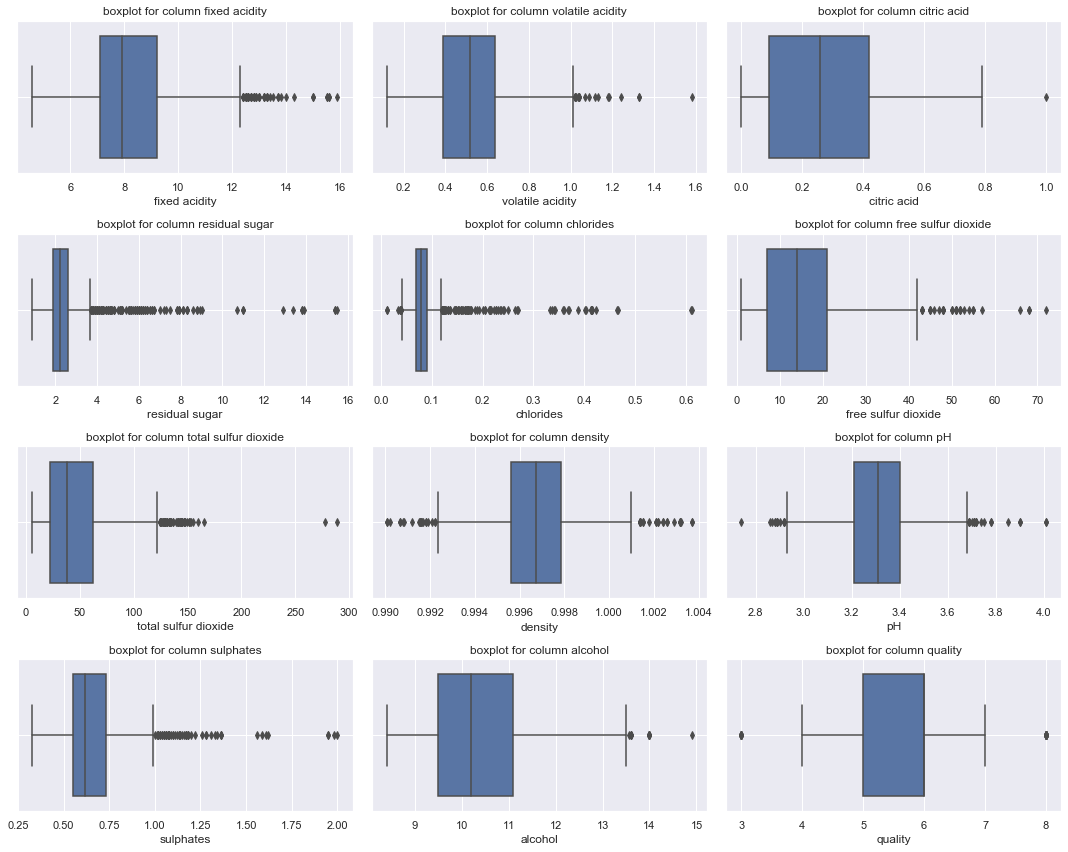

In [25]:
# boxplot for all the columns showing the distribution, skewness and presence of outliers
for i, k in enumerate(df.keys()):
    plt.subplot(4, 3, i+1)
    sns.set()
    sns.boxplot(k, data=df)
    plt.title('boxplot for column ' + k)
    plt.grid('on')
    plt.tight_layout()

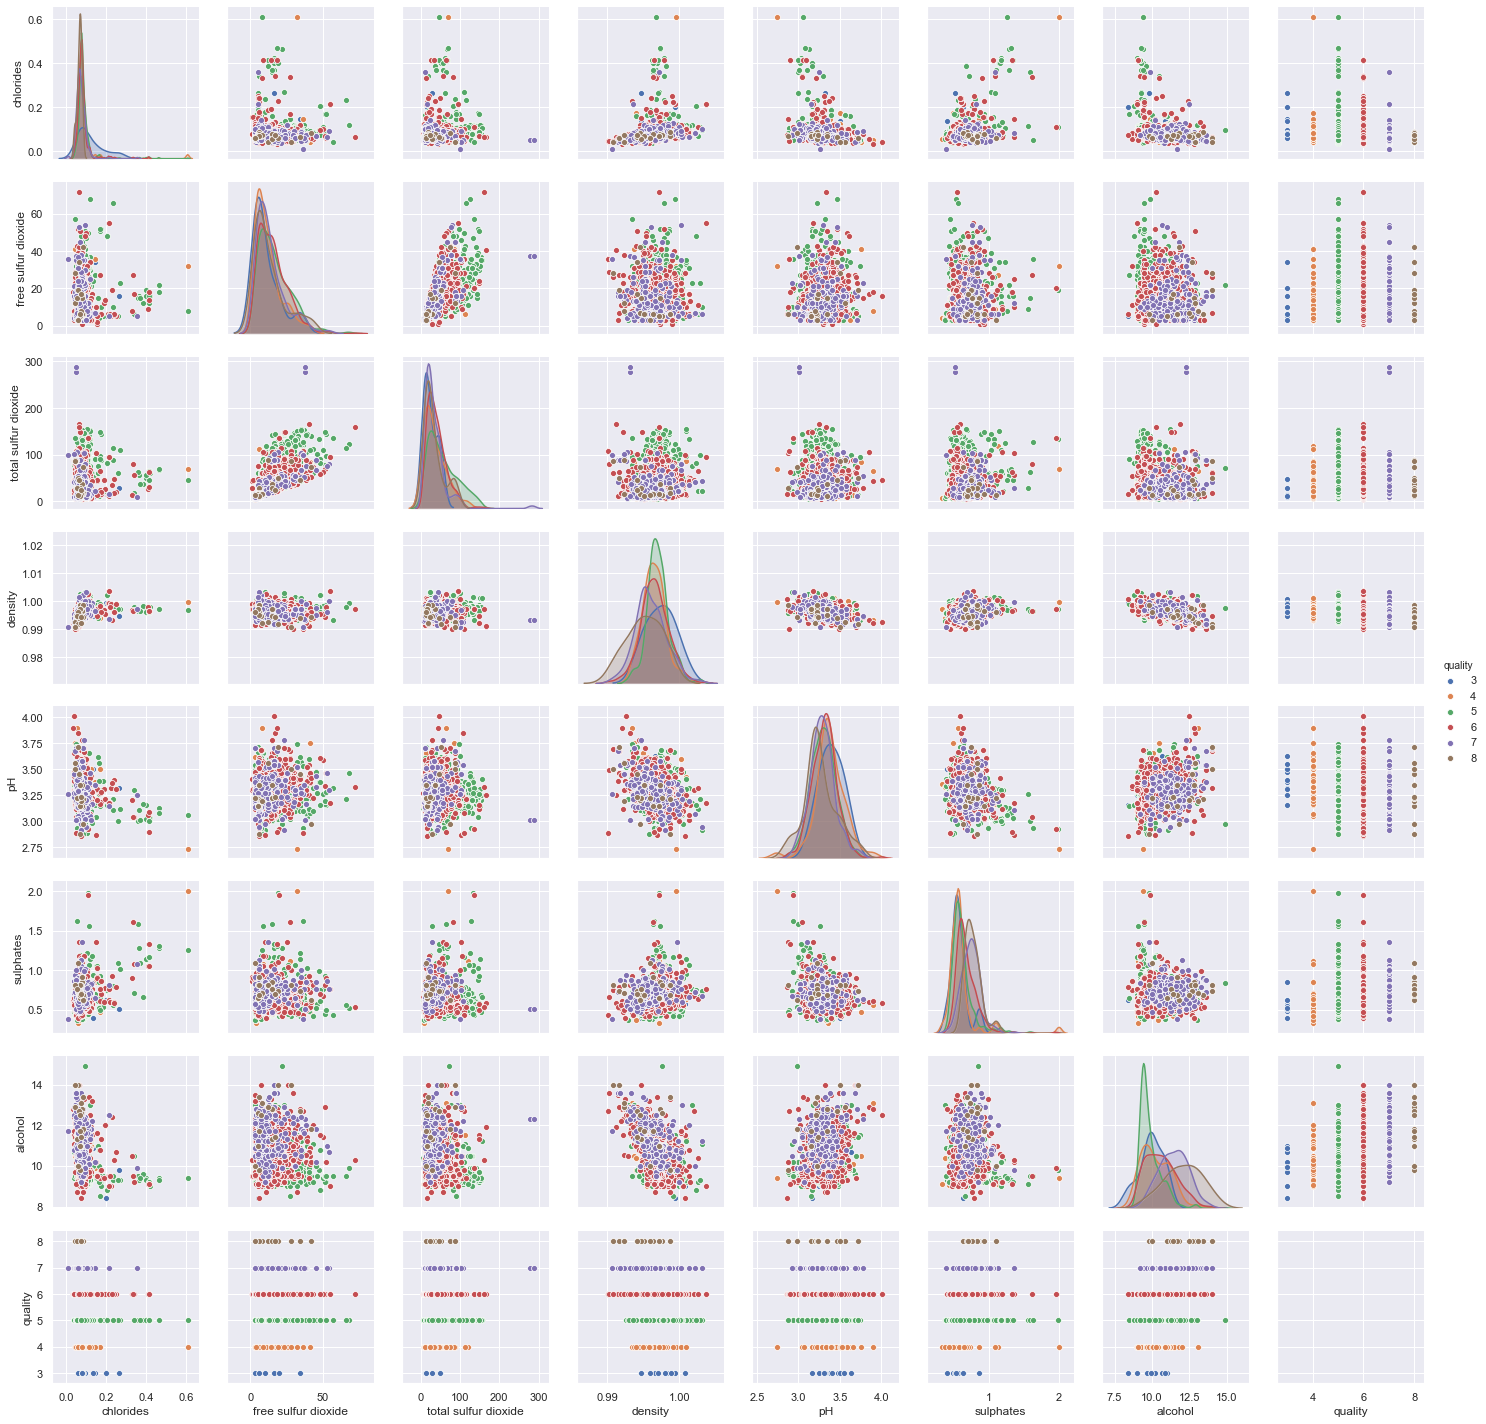

In [26]:
# pair plot for the first four rows to analyse the relationships between them
CData = df.iloc[:, 4:]
sns.pairplot(CData, hue='quality')

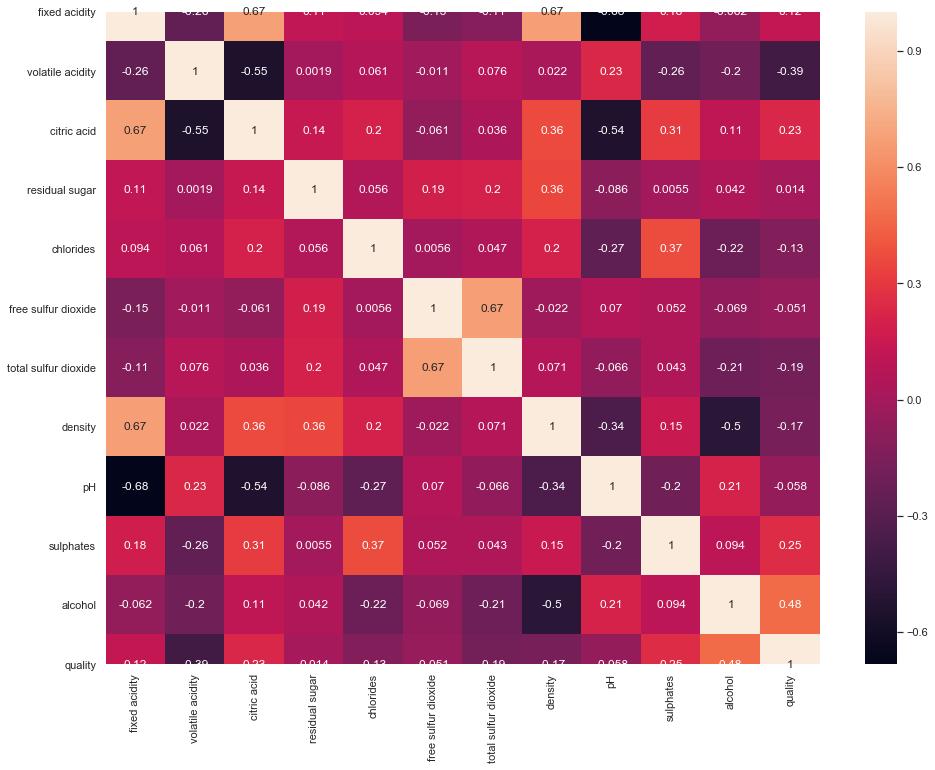

In [27]:
# checking correlation between features using heatmap
data = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(data=data, annot=True)

In [28]:
# checking how the features are correlated to the quality feature
data['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [29]:
# based on this, we can see that the data is more between 5, 6 and 7
condition = [(df.quality > 6), (df.quality <=4)]
# let divide them into categories 
category = ['likely', 'not_likely']
df['quality_category'] = np.select(condition, category, default='normal')
df.quality_category.value_counts()

normal        1319
likely         217
not_likely      63
Name: quality_category, dtype: int64

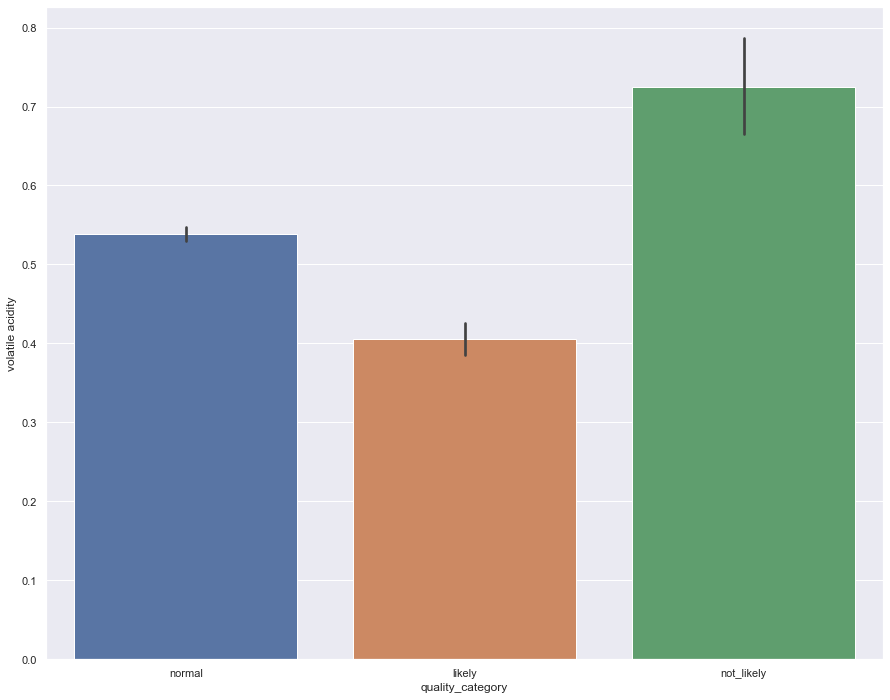

In [30]:
sns.barplot(x = df['quality_category'], y=df['volatile acidity'])

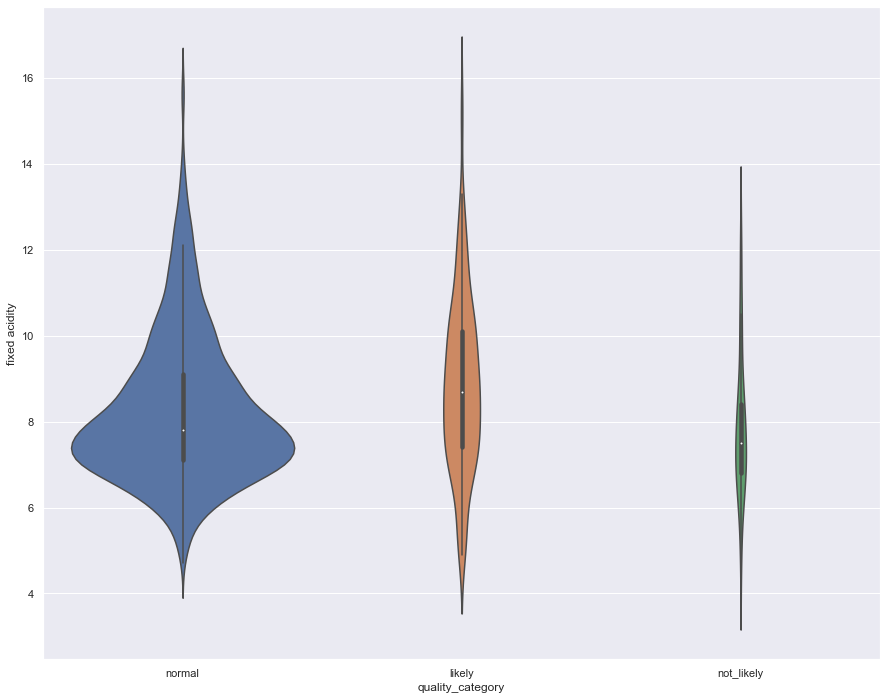

In [31]:
sns.violinplot(x = df['quality_category'], y=df['fixed acidity'], scale='count')

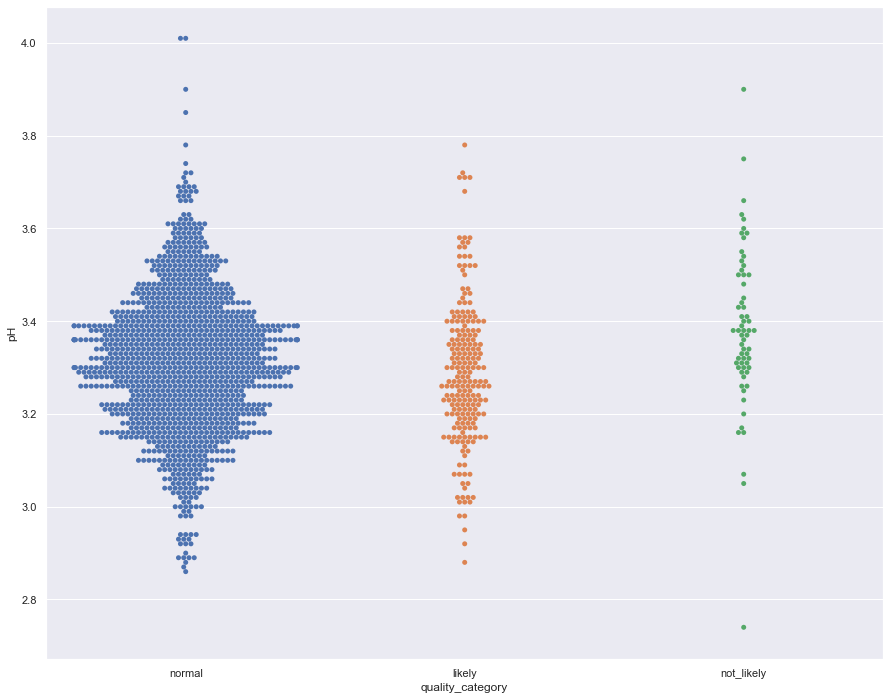

In [32]:
sns.swarmplot(x = df['quality_category'], y=df['pH'])

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [33]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,normal
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,normal
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,normal
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,normal
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,normal


In [34]:
df['residual sugar'].unique()

array([ 1.9 ,  2.6 ,  2.3 ,  1.8 ,  1.6 ,  1.2 ,  2.  ,  6.1 ,  3.8 ,
        3.9 ,  1.7 ,  4.4 ,  2.4 ,  1.4 ,  2.5 , 10.7 ,  5.5 ,  2.1 ,
        1.5 ,  5.9 ,  2.8 ,  2.2 ,  3.  ,  3.4 ,  5.1 ,  4.65,  1.3 ,
        7.3 ,  7.2 ,  2.9 ,  2.7 ,  5.6 ,  3.1 ,  3.2 ,  3.3 ,  3.6 ,
        4.  ,  7.  ,  6.4 ,  3.5 , 11.  ,  3.65,  4.5 ,  4.8 ,  2.95,
        5.8 ,  6.2 ,  4.2 ,  7.9 ,  3.7 ,  6.7 ,  6.6 ,  2.15,  5.2 ,
        2.55, 15.5 ,  4.1 ,  8.3 ,  6.55,  4.6 ,  4.3 ,  5.15,  6.3 ,
        6.  ,  8.6 ,  7.5 ,  2.25,  4.25,  2.85,  3.45,  2.35,  2.65,
        9.  ,  8.8 ,  5.  ,  1.65,  2.05,  0.9 ,  8.9 ,  8.1 ,  4.7 ,
        1.75,  7.8 , 12.9 , 13.4 ,  5.4 , 15.4 ,  3.75, 13.8 ,  5.7 ,
       13.9 ])

In [35]:
# calculating total acidity
df['total_acidity'] = (df['fixed acidity'] - df['volatile acidity']) * df['pH']
# high ph shows that it is acidic
# normal acidity for wines is about 2.5 to 4.5
# high presence of volatile acids is considerd as bad as it induces wine spoliage
# addition of sulphure dioxide will limit the growth of these voliatile acids

In [36]:
# high presence of volatile acids is considerd as bad as it induces wine spoliage
# a feature that flags high and normal volaticity
# 0: normal, 1: high
df['volaticity'] = np.where(df['volatile acidity'] > 0.7, 0, 1)

In [37]:
# where residual sugar greater than 5.0 is off dry denoted as a
# where residual sugar from 5.0-15 is sweet wine
# 0 : sweet, 1 ; dry
df['S/D'] = np.where(df['residual sugar'] >=5.0, 0, 1)
df['S/D'].value_counts()

1    1514
0      85
Name: S/D, dtype: int64

In [38]:
# transforming the ordinal data to numeric data
df['quality_category'][df['quality_category'] == 'likely'] =0
df['quality_category'][df['quality_category'] == 'normal'] =1
df['quality_category'][df['quality_category'] == 'not_likely'] =2

In [39]:
df['quality_category'] = df['quality_category'].astype('int64')

In [40]:
df.alcohol.unique()

array([ 9.4       ,  9.8       , 10.        ,  9.5       , 10.5       ,
        9.2       ,  9.9       ,  9.1       ,  9.3       ,  9.        ,
        9.7       , 10.1       , 10.6       ,  9.6       , 10.8       ,
       10.3       , 13.1       , 10.2       , 10.9       , 10.7       ,
       12.9       , 10.4       , 13.        , 14.        , 11.5       ,
       11.4       , 12.4       , 11.        , 12.2       , 12.8       ,
       12.6       , 12.5       , 11.7       , 11.3       , 12.3       ,
       12.        , 11.9       , 11.8       ,  8.7       , 13.3       ,
       11.2       , 11.6       , 11.1       , 13.4       , 12.1       ,
        8.4       , 12.7       , 14.9       , 13.2       , 13.6       ,
       13.5       , 10.03333333,  9.55      ,  8.5       , 11.06666667,
        9.56666667, 10.55      ,  8.8       , 13.56666667, 11.95      ,
        9.95      ,  9.23333333,  9.25      ,  9.05      , 10.75      ])

In [41]:
# calculating z score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.41153983, 0.40257167,
        0.23694444],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.68155666, 2.48402971,
        0.23694444],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.52296848, 2.48402971,
        0.23694444],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 1.14217823, 0.40257167,
        0.23694444],
       [1.39015528, 0.65462046, 0.77526673, ..., 1.3469918 , 0.40257167,
        0.23694444],
       [1.33270223, 1.21684919, 1.02199944, ..., 1.24300681, 0.40257167,
        0.23694444]])

In [42]:
y = df['quality']

In [43]:
# detecting outliers
outliers = list(set(np.where(z > 3)[0]))

print(len(outliers))
# dropping outliers
new_df = df.drop(outliers,axis = 0).reset_index(drop = False)
display(new_df)

y_new = y[list(new_df["index"])]

200


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category,total_acidity,volaticity,S/D
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,23.51700,1,1
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,22.14400,0,1
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1,22.95040,0,1
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1,34.50720,1,1
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,23.51700,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1,19.32000,1,1
1395,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1,18.83200,1,1
1396,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1,19.80180,1,1
1397,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1,18.76035,1,1


In [44]:
df['residual sugar'] = np.log(df['residual sugar'] +1)
df['total sulfur dioxide'] = np.log(df['total sulfur dioxide'] + 1)
df['sulphates'] = np.log(df['sulphates'] + 1)
df['fixed acidity'] =  np.log(df['fixed acidity'] + 1)
df['total sulfur dioxide']= np.log(df['total sulfur dioxide'] + 1)

In [45]:
new_df = df.drop(outliers,axis = 0).reset_index(drop = False)
display(new_df)

y_new = y[list(new_df["index"])]

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category,total_acidity,volaticity,S/D
0,0,2.128232,0.700,0.00,1.064711,0.076,11.0,1.516302,0.99780,3.51,0.444686,9.4,5,1,23.51700,1,1
1,1,2.174752,0.880,0.00,1.280934,0.098,25.0,1.652403,0.99680,3.20,0.518794,9.8,5,1,22.14400,0,1
2,2,2.174752,0.760,0.04,1.193922,0.092,15.0,1.610903,0.99700,3.26,0.500775,9.8,5,1,22.95040,0,1
3,3,2.501436,0.280,0.56,1.064711,0.075,17.0,1.631370,0.99800,3.16,0.457425,9.8,6,1,34.50720,1,1
4,4,2.128232,0.700,0.00,1.064711,0.076,11.0,1.516302,0.99780,3.51,0.444686,9.4,5,1,23.51700,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,1594,1.974081,0.600,0.08,1.098612,0.090,32.0,1.570003,0.99490,3.45,0.457425,10.5,5,1,19.32000,1,1
1395,1595,1.931521,0.550,0.10,1.163151,0.062,39.0,1.599639,0.99512,3.52,0.565314,11.2,6,1,18.83200,1,1
1396,1596,1.987874,0.510,0.13,1.193922,0.076,29.0,1.550446,0.99574,3.42,0.559616,11.0,6,1,19.80180,1,1
1397,1597,1.931521,0.645,0.12,1.098612,0.075,32.0,1.570003,0.99547,3.57,0.536493,10.2,5,1,18.76035,1,1


In [46]:
x = df.drop('quality', axis=1)
y = df['quality']
X = new_df.drop('quality', axis=1)


In [47]:
df.corr()['quality']

fixed acidity           0.115684
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.021687
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.162451
density                -0.174919
pH                     -0.057731
sulphates               0.280984
alcohol                 0.476166
quality                 1.000000
quality_category       -0.812367
total_acidity           0.166757
volaticity              0.218766
S/D                    -0.027409
Name: quality, dtype: float64

In [48]:
df['total sulfur dioxide'].unique()

array([1.51630194, 1.65240309, 1.61090348, 1.6313704 , 1.55044602,
       1.62813102, 1.40879982, 1.37230673, 1.72894905, 1.64666717,
       1.48187664, 1.7890235 , 1.79241697, 1.73066229, 1.61801131,
       1.66329448, 1.53419401, 1.42984555, 1.24844126, 1.52246703,
       1.34370344, 1.68988188, 1.7467967 , 1.69208955, 1.59570923,
       1.32776143, 1.48929923, 1.38522686, 1.700619  , 1.57900914,
       1.31050619, 1.7483181 , 1.27114985, 1.71824047, 1.75569899,
       1.66847353, 1.57456514, 1.2231562 , 1.74213674, 1.60347857,
       1.74525955, 1.54519363, 1.46607654, 1.71449622, 1.56531666,
       1.56049976, 1.68537049, 1.5996388 , 1.6345469 , 1.77833323,
       1.49643402, 1.76409393, 1.4395687 , 1.78318278, 1.77458615,
       1.69641296, 1.73568791, 1.41960684, 1.52842695, 1.65794141,
       1.64372093, 1.79789935, 1.58334052, 1.73894711, 1.74370634,
       1.63766276, 1.47414401, 1.70471349, 1.29172467, 1.7067206 ,
       1.77584598, 1.72368942, 1.45764638, 1.6407201 , 1.73403

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
from sklearn.model_selection import train_test_split

In [63]:
dfX.drop('quality', axis=1, inplace=True)

In [64]:
# Without any preprocess 
X_train, X_test, y_train, y_test = train_test_split(dfX,y, test_size=0.3, random_state=42)

model = LogisticRegression(random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred, average='macro'))
print("Recall:",recall_score(y_test,y_pred, average='macro'))
print("F1 Score:",f1_score(y_test,y_pred, average='macro'))

Accuracy: 0.5458333333333333
Precision: 0.22480012598833135
Recall: 0.22322369342861148
F1 Score: 0.20520837221328772


In [52]:
# After preprocesing  
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

model = LogisticRegression(random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred, average='macro'))
print("Recall:",recall_score(y_test,y_pred, average='macro'))
print("F1 Score:",f1_score(y_test,y_pred, average='macro'))

Accuracy: 0.69375
Precision: 0.5239853193477927
Recall: 0.4952790346907994
F1 Score: 0.502323634690571


In [53]:
# drop outliers 
X_train, X_test, y_train, y_test = train_test_split(X,y_new, test_size=0.3, random_state=42)

model = LogisticRegression(random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# dropped outliers
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred, average='macro'))
print("Recall:",recall_score(y_test,y_pred, average='macro'))
print("F1 Score:",f1_score(y_test,y_pred, average='macro'))

Accuracy: 0.4928571428571429
Precision: 0.20548148148148151
Recall: 0.2369590643274854
F1 Score: 0.2146031746031746


In [65]:
# Without any preprocess 
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(dfX,y, test_size=0.3, random_state=42)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred3 = xgb.predict(X_test)

from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

print("Accuracy:",accuracy_score(y_test,pred3))
print("Precision:",precision_score(y_test,pred3, average='macro'))
print("Recall:",recall_score(y_test,pred3, average='macro'))
print("F1 Score:",f1_score(y_test,pred3, average='macro'))

Accuracy: 0.65625
Precision: 0.3852887865354173
Recall: 0.3566884668957957
F1 Score: 0.3651582901953958


In [66]:
# After preprocesing
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred3 = xgb.predict(X_test)

from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

print("Accuracy:",accuracy_score(y_test,pred3))
print("Precision:",precision_score(y_test,pred3, average='macro'))
print("Recall:",recall_score(y_test,pred3, average='macro'))
print("F1 Score:",f1_score(y_test,pred3, average='macro'))

Accuracy: 0.7979166666666667
Precision: 0.6248780270655271
Recall: 0.6139158610060249
F1 Score: 0.6145029803763981


In [67]:
# After preprocesing and dropping outliers
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y_new, test_size=0.3, random_state=42)
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred3 = xgb.predict(X_test)

from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

print("Accuracy:",accuracy_score(y_test,pred3))
print("Precision:",precision_score(y_test,pred3, average='macro'))
print("Recall:",recall_score(y_test,pred3, average='macro'))
print("F1 Score:",f1_score(y_test,pred3, average='macro'))

Accuracy: 0.7833333333333333
Precision: 0.8893042952208106
Recall: 0.7496491228070175
F1 Score: 0.7743393882937432


In [55]:
# Without any preprocess 
import lightgbm as lgb
X_train, X_test, y_train, y_test = train_test_split(dfX,y, test_size=0.3, random_state=42)

model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_train, y_train)
pred = model_lgb.predict(X_test)

from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

print("Accuracy:",accuracy_score(y_test,pred))
print("Precision:",precision_score(y_test,pred, average='macro'))
print("Recall:",recall_score(y_test,pred, average='macro'))
print("F1 Score:",f1_score(y_test,pred, average='macro'))

Accuracy: 0.7738095238095238
Precision: 0.7857331815804854
Recall: 0.7426794258373206
F1 Score: 0.755789794178541


In [69]:
# After preprocesing
import lightgbm as lgb
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_train, y_train)
pred = model_lgb.predict(X_test)

from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

print("Accuracy:",accuracy_score(y_test,pred))
print("Precision:",precision_score(y_test,pred, average='macro'))
print("Recall:",recall_score(y_test,pred, average='macro'))
print("F1 Score:",f1_score(y_test,pred, average='macro'))

Accuracy: 0.8041666666666667
Precision: 0.654491861598825
Recall: 0.6182934005884826
F1 Score: 0.6222096695276128


In [68]:
# After preprocesing and dropping outliers
import lightgbm as lgb
X_train, X_test, y_train, y_test = train_test_split(X,y_new, test_size=0.3, random_state=42)

model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_train, y_train)
pred = model_lgb.predict(X_test)

from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

print("Accuracy:",accuracy_score(y_test,pred))
print("Precision:",precision_score(y_test,pred, average='macro'))
print("Recall:",recall_score(y_test,pred, average='macro'))
print("F1 Score:",f1_score(y_test,pred, average='macro'))

Accuracy: 0.7738095238095238
Precision: 0.7857331815804854
Recall: 0.7426794258373206
F1 Score: 0.755789794178541


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

### As we can see, the best performing model is XGB Classifier after doing some preprocessing techniques and dropping the outliers

- Lets analyse the results

In [70]:
from sklearn.model_selection import train_test_split, cross_validate

X_train, X_test, y_train, y_test = train_test_split(X,y_new, test_size=0.3, random_state=42)

model = XGBClassifier()
cv = cross_validate(model,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.7670681600720437
Test accuracy: 0.7690476190476191


In [71]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

final_model = cv["estimator"][0]

y_pred = final_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred, average='macro'))
print("Recall:",recall_score(y_test,y_pred, average='macro'))
print("F1 Score:",f1_score(y_test,y_pred, average='macro'))

Accuracy: 0.7690476190476191
Precision: 0.7834432392456552
Recall: 0.7402232854864434
F1 Score: 0.7534168834651538


### There is a little under fitting as the model performs better on the test data than on the train data

In [72]:
y.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

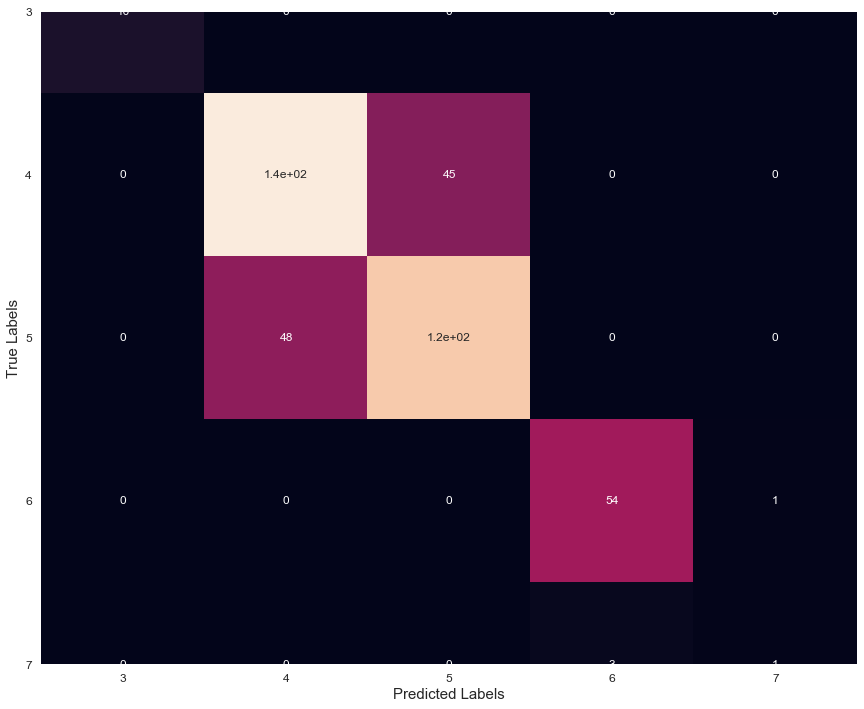

In [73]:
# plotting the confusion matrix
pred = cv["estimator"][0].predict(X_test)

cm = confusion_matrix(y_test, pred)
#plt.figure(figsize=(12, 4))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels([3, 4, 5, 6, 7, 8], fontsize = 12)
ax.yaxis.set_ticklabels([3, 4, 5, 6, 7, 8], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

##### This model can be further improved by 

- More data
- Feature engineering
- Model hyperparameter tuning
- Removing values with very little correlation
- More EDA
- Better handling of outliers

### I hope you enjoyed this notebook. Thank you!
